In [9]:
import numpy as np
import matplotlib.pyplot as plt

## 9.1.21, 9.4.7, 9.5.21, 9.6.21

# ======================= 9.1.21  =======================

In [10]:
def newton_method(f, df, ddf, x0, epsilon=1e-6, max_iter=1000):
    x_n = x0
    for iterations in range(max_iter):
        f_prime = df(x_n)
        f_double_prime = ddf(x_n)
        if abs(f_double_prime) < np.finfo(float).eps:
            raise ValueError("Вторая производная слишком мала, деление на ноль")
        x_n1 = x_n - f_prime / f_double_prime
        if abs(x_n1 - x_n) < epsilon:
            return x_n1, iterations
        x_n = x_n1
    raise ValueError("Метод не сошелся за максимальное количество итераций")

In [11]:
f = lambda x: x**5 - 5**x
df = lambda x: 5*x**4 - 5**x*np.log(5)
ddf = lambda x: 20*x**3 - 5**x*np.log(5)*np.log(5)

a, b = 0.5, 1.5
x0 = 1  # начальное приближение
epsilon = 1e-6

x_min, n = newton_method(f, df, ddf, x0, epsilon)
print(f"Минимум функции достигается в точке x = {x_min}, найдет за {n} итераций.")


Минимум функции достигается в точке x = 1.2410554672442062, найдет за 5 итераций.


# ======================= 9.4.7 =======================


In [12]:
def f(x, n):
    return ((-1)**n) * np.cos(2 * n * x) / n**(5/2)

def partial_sum(x, N=350):
    return sum(f(x, n) for n in range(1, N + 1))

def func_to_optimize(x):
    return partial_sum(x)

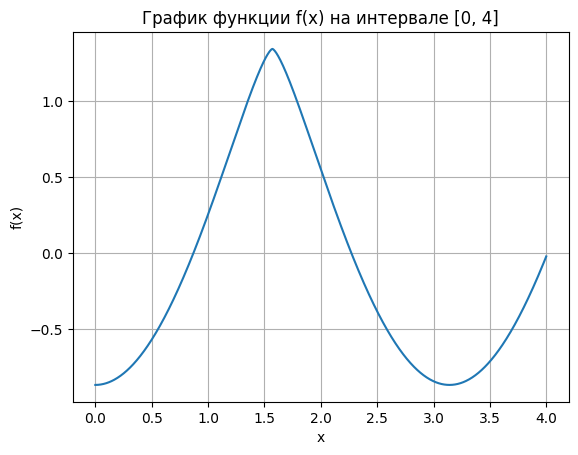

In [13]:
a, b = 0, 4
x_values = np.linspace(a, b, 1000)
y_values = partial_sum(x_values)

plt.plot(x_values, y_values)
plt.title('График функции f(x) на интервале [0, 4]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [14]:
def golden_section_search(f, a, b, eps=1e-4):
    golden_ratio_inverted = 2 / (1 + np.sqrt(5))
    c = b - golden_ratio_inverted / (b - a) 
    d = a + golden_ratio_inverted / (b - a) 
    while abs(c - d) > eps:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - golden_ratio_inverted / (b - a)
        d = a + golden_ratio_inverted / (b - a)
    return (b + a) / 2

In [15]:
minimum = golden_section_search(func_to_optimize, a, b)
maximum = golden_section_search(lambda x: -func_to_optimize(x), a, b)

print(f"Минимум функции достигается в точке x = {minimum} со значением f(x) = {func_to_optimize(minimum)}")
print(f"Максимум функции достигается в точке x = {maximum} со значением f(x) = {func_to_optimize(maximum)}")

KeyboardInterrupt: 

# ======================= 9.5.21 =======================


In [16]:
from scipy.optimize import minimize

def f(xy):
    x, y = xy
    return x**2 + 3*y**2 + np.sin(x - y + 3)

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])


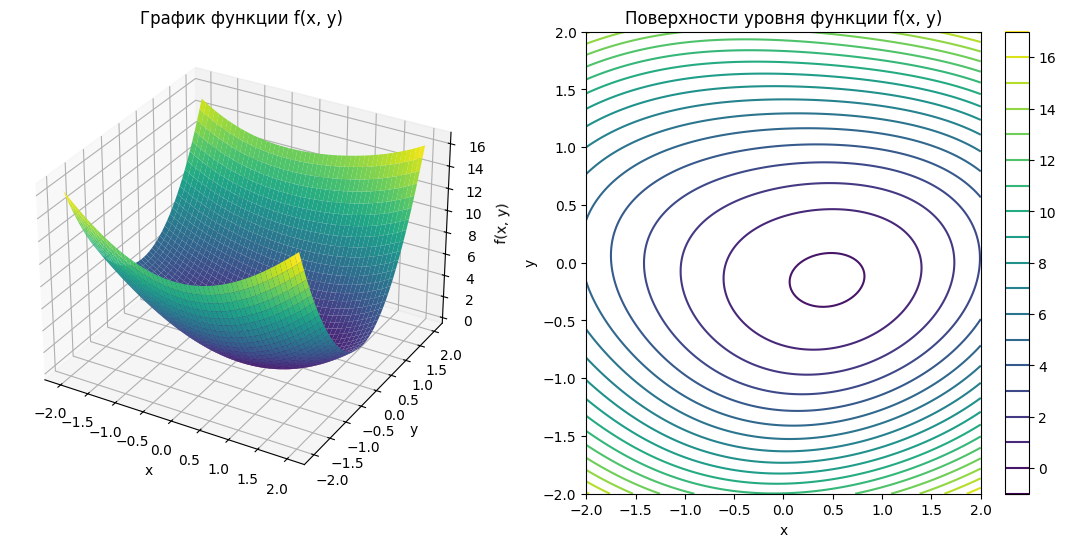

In [17]:
# 3D график функции
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('График функции f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Контурный график поверхностей уровня
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, 20, cmap='viridis')
ax2.set_title('Поверхности уровня функции f(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour, ax=ax2)

plt.show()

In [18]:
initial_guess = [0, 0]
result = minimize(f, initial_guess, bounds=[(-2, 2), (-2, 2)], tol=1e-6)

if result.success:
    print(f"Минимум функции достигается в точке x = {result.x[0]}, y = {result.x[1]} со значением f(x, y) = {result.fun}")
else:
    print("Минимум функции не найден.")


Минимум функции достигается в точке x = 0.448742081438306, y = -0.14958301051635287 со значением f(x, y) = -0.17252314864696905


# ======================= 9.6.21 =======================


In [19]:
def f(x):
    x1, x2 = x
    return 4*x1**2 + 0.5*x1*x2 + 0.5*x2**2 + 6.5*x1 - 2.5*x2

def df_dx1(x):
    x1, x2 = x
    return 8*x1 + 0.5*x2 + 6.5

def df_dx2(x):
    x1, x2 = x
    return 0.5*x1 + x2 - 2.5

def d2f_dx1(x):
    return 8

def d2f_dx2(x):
    return 1

In [20]:
def coordinate_descent(f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)
    iterations = 0
    for iterations in range(max_iter):
        x_old = np.copy(x)

        # Минимизация по x1
        x1_minimization_function = lambda x1: f([x1, x[1]])
        df_x1_minimization = lambda x1: df_dx1([x1, x[1]])
        x[0], iterations_1 = newton_method(x1_minimization_function, df_x1_minimization, d2f_dx1, x[0])

        # Минимизация по x2
        x2_minimization_function = lambda x2: f([x[0], x2])
        df_x2_minimization = lambda x2: df_dx2([x[0], x2])
        x[1], iter2 = newton_method(x2_minimization_function, df_x2_minimization, d2f_dx2, x[1])

        if np.linalg.norm(x - x_old) < tol:
            break

    return x, iterations

In [21]:
minimum, num_iterations = coordinate_descent(f, [0, 0], tol=1e-6)
print(f"Минимум функции достигается в точке x1 = {minimum[0]}, x2 = {minimum[1]} со значением f(x) = {f(minimum)}")
print(f"Количество итераций: {num_iterations}")


Минимум функции достигается в точке x1 = -0.9999999944120646, x2 = 2.9999999972060323 со значением f(x) = -7.0
Количество итераций: 5


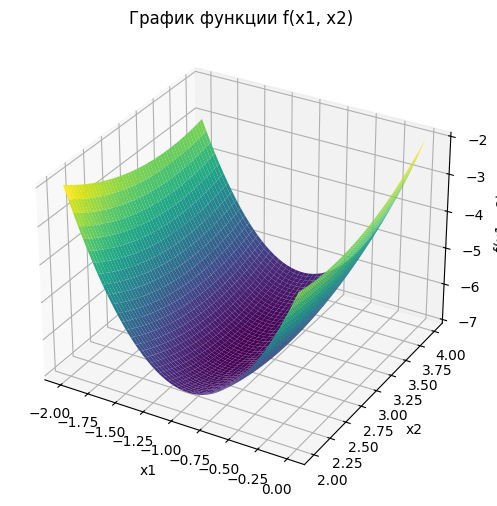

In [22]:
# Построение графика функции
x1 = np.linspace(-2, 0, 400)
x2 = np.linspace(2, 4, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_title('График функции f(x1, x2)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
plt.show()